# Question: Whether or not a user click on advertisment Add?


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


sns.set_style("whitegrid")

In [2]:
df=pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.describe() # shows no miss data! no necessory for heatmap!

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


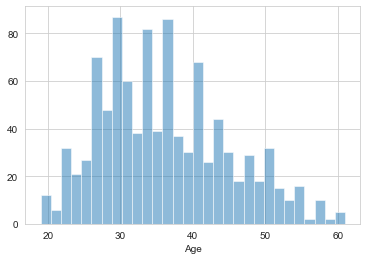

In [5]:
sns.distplot(df['Age'], kde=False,bins=30,hist_kws={"alpha":0.5})

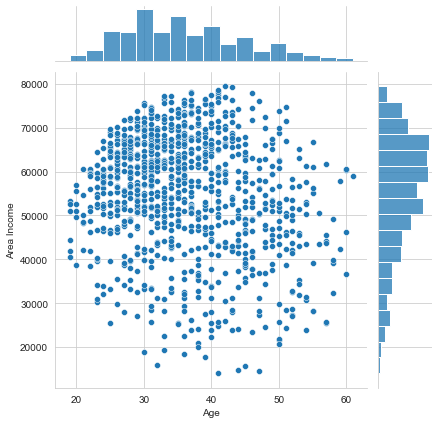

In [6]:
sns.jointplot(x='Age', y='Area Income', data=df)

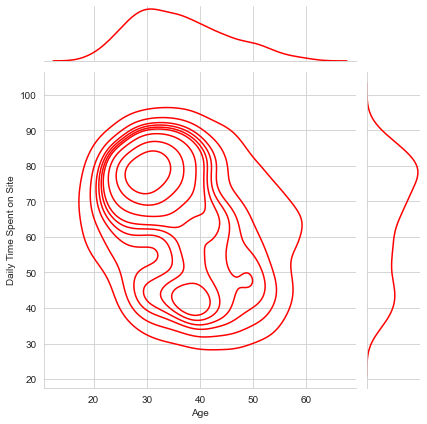

In [7]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, kind="kde", color="red")

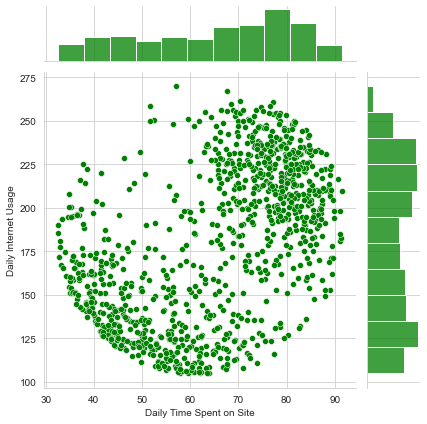

In [8]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df, color="green")


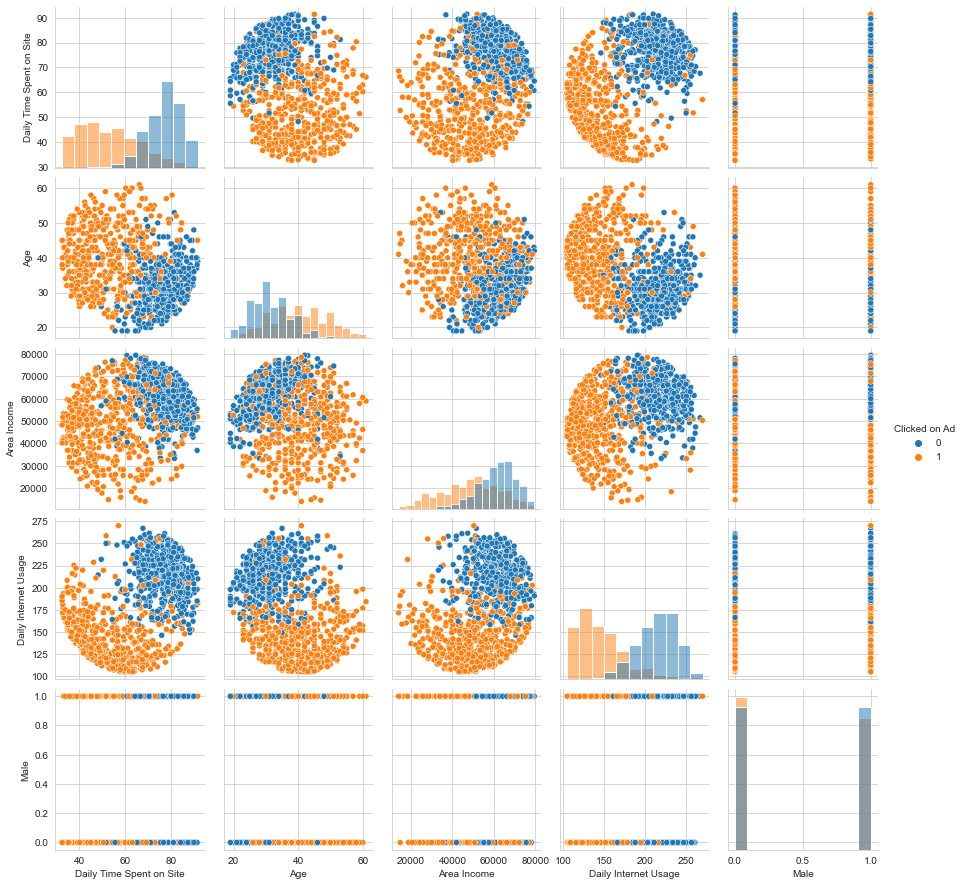

In [9]:
sns.pairplot(df, hue="Clicked on Ad", diag_kind="hist")

In [10]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [11]:
features=df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
labels=df[['Clicked on Ad']]

### Normalized Data

In [12]:
features = preprocessing.StandardScaler().fit(features).transform(features)   #array

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [14]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 5) (700, 1)
Test set: (300, 5) (300, 1)


In [15]:
print(type(X_train))
print(type(y_train))


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [16]:
def print_results(results):
    print('Best PARAMS: {}\n'.format(results.best_params_))
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}' .format(round(mean,3), round(std*2,3), params))

In [17]:
lr=LogisticRegression()
parameters={
        'C':[0.01, 0.01, 0.1,1, 10, 100, 1000],
        'solver': ['liblinear'],
}

In [18]:
cv=GridSearchCV(lr, parameters, cv=5)


In [19]:
cv.fit(X_train, y_train.values.ravel())   #y_train is daraframe, so we used values.ravel


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
print_results(cv)


Best PARAMS: {'C': 1, 'solver': 'liblinear'}

0.966 (+/-0.039) for {'C': 0.01, 'solver': 'liblinear'}
0.966 (+/-0.039) for {'C': 0.01, 'solver': 'liblinear'}
0.969 (+/-0.038) for {'C': 0.1, 'solver': 'liblinear'}
0.971 (+/-0.026) for {'C': 1, 'solver': 'liblinear'}
0.969 (+/-0.029) for {'C': 10, 'solver': 'liblinear'}
0.969 (+/-0.029) for {'C': 100, 'solver': 'liblinear'}
0.969 (+/-0.029) for {'C': 1000, 'solver': 'liblinear'}


In [21]:
print(cv.best_estimator_)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [22]:
y_pred = cv.predict(X_test)
y_pred_prob= cv.predict_proba(X_test)
y_pred_prob


array([[2.31108758e-02, 9.76889124e-01],
       [4.37110460e-04, 9.99562890e-01],
       [1.83030810e-03, 9.98169692e-01],
       [4.71005986e-03, 9.95289940e-01],
       [9.87135701e-01, 1.28642992e-02],
       [5.48870263e-01, 4.51129737e-01],
       [9.78916817e-01, 2.10831827e-02],
       [3.84645771e-04, 9.99615354e-01],
       [9.89651533e-01, 1.03484666e-02],
       [7.33850998e-05, 9.99926615e-01],
       [9.94645466e-01, 5.35453353e-03],
       [1.69397330e-03, 9.98306027e-01],
       [1.00735863e-04, 9.99899264e-01],
       [9.85608726e-01, 1.43912738e-02],
       [3.75887530e-04, 9.99624112e-01],
       [4.81236178e-05, 9.99951876e-01],
       [1.34172780e-05, 9.99986583e-01],
       [2.99157180e-03, 9.97008428e-01],
       [9.56232167e-01, 4.37678333e-02],
       [1.56477256e-04, 9.99843523e-01],
       [9.94719594e-01, 5.28040582e-03],
       [1.35397901e-02, 9.86460210e-01],
       [5.80534463e-05, 9.99941947e-01],
       [8.83436628e-01, 1.16563372e-01],
       [9.951647

In [23]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

[[143   3]
 [  6 148]]


In [24]:
#Log loss( Logarithmic loss) 
#measures the performance of a classifier where the predicted output is a probability value between 0 and 1.
from sklearn.metrics import log_loss
print('probability', log_loss(y_test, y_pred_prob))

probability 0.12087133872769641


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[148   6]
 [  3 143]]


Confusion matrix, without normalization
[[148   6]
 [  3 143]]


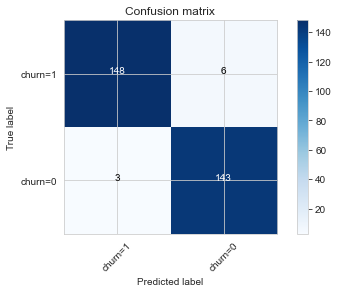

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')